In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = yf.download('MSFT','2020-01-01', '2023-09-09')

[*********************100%%**********************]  1 of 1 completed


In [4]:
data = data.reset_index()

In [13]:
training_set = data.iloc[:756, 5:6]

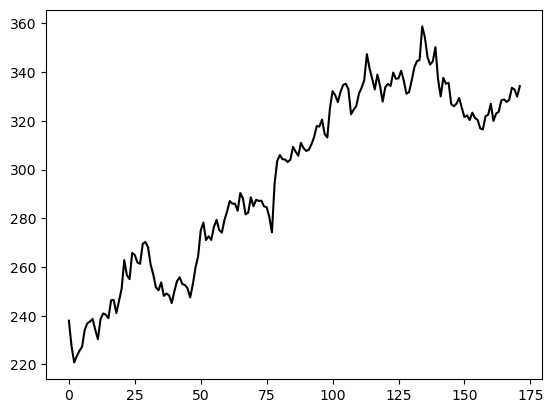

In [6]:
real_stock_price = data.iloc[756:, 5:6].values.tolist()
a = []
for i in range(172):
    a.append(float(real_stock_price[i][0]))
plt.plot(a, color = 'black')

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

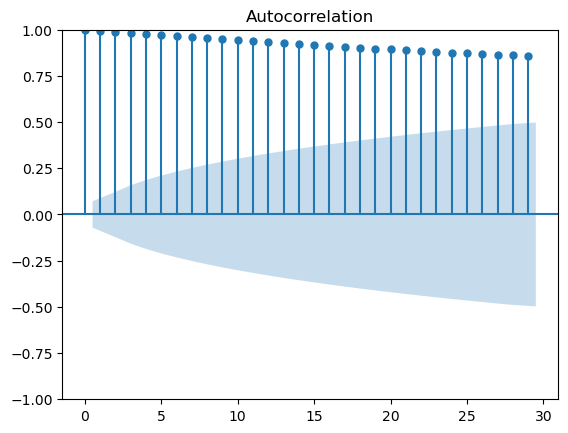

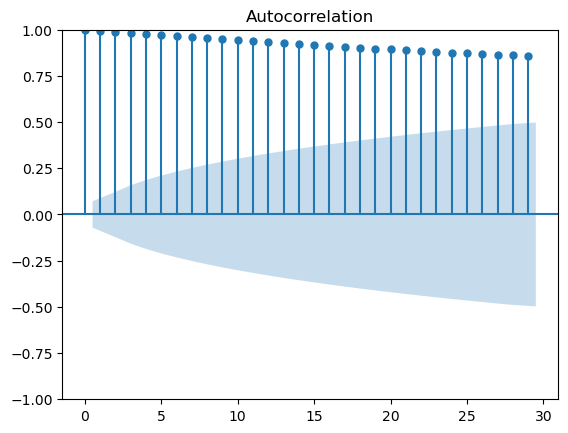

In [11]:
plot_acf(training_set)

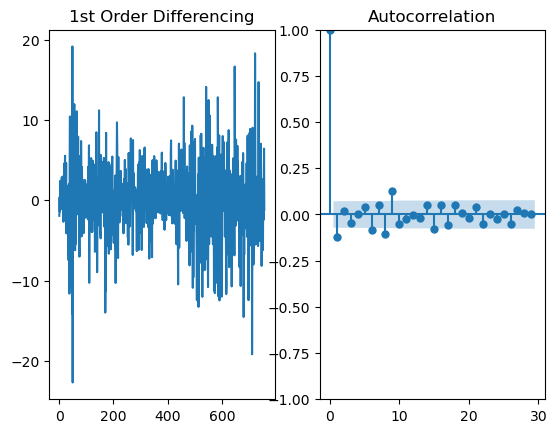

In [14]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(training_set.diff())

ax2 = f.add_subplot(122)
plot_acf(training_set.diff().dropna(), ax=ax2)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
df_stationarityTest = adfuller(training_set.diff().dropna())

In [17]:
print("P-value: ", df_stationarityTest[1])

P-value:  2.8293157272802616e-15


In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

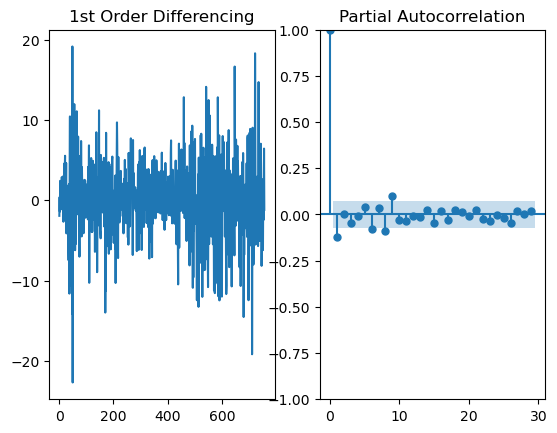

In [19]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(training_set.diff())

ax2 = f.add_subplot(122)
plot_pacf(training_set.diff().dropna(), ax=ax2)
plt.show()

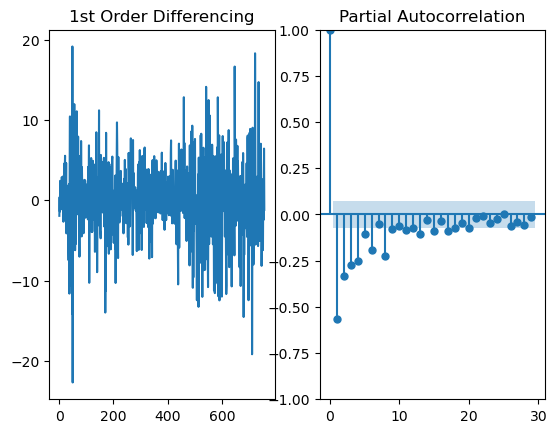

In [20]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(training_set.diff())

ax2 = f.add_subplot(122)
plot_pacf(training_set.diff().diff().dropna(), ax=ax2)
plt.show()

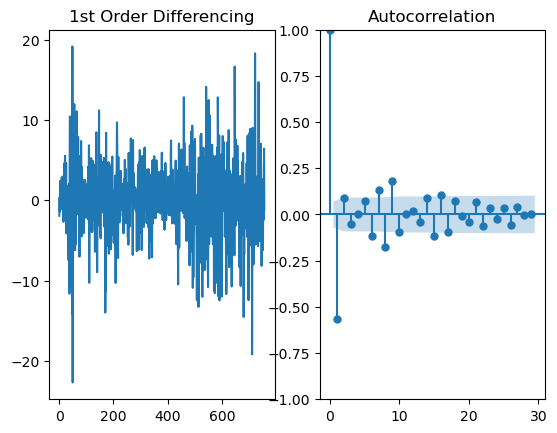

In [21]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(training_set.diff())

ax2 = f.add_subplot(122)
plot_acf(training_set.diff().diff().dropna(), ax=ax2)
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
arima_model = ARIMA(training_set, order = (1,1,1))
model = arima_model.fit()

In [27]:
pred = model.predict(start=756, end=927, dynamic=False)

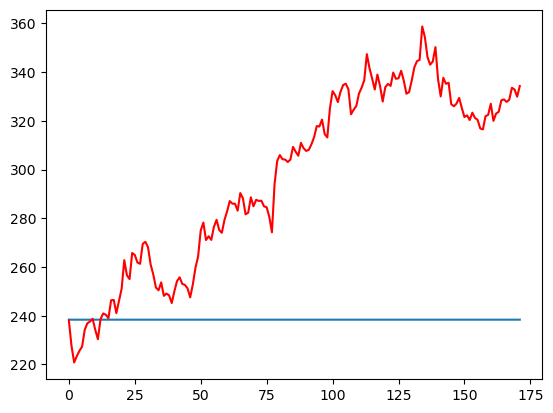

In [31]:
plt.plot(pred)
plt.plot(a, color='red')

In [30]:
pred = pred.reset_index(drop=True)